# Inaugural Project

In [41]:
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt
import math

class HouseholdSpecializationModelClass:

    def __init__(self):
        """ setup model """

        # a. create namespaces
        par = self.par = SimpleNamespace()
        sol = self.sol = SimpleNamespace()

        # b. preferences
        par.rho = 2.0
        par.nu = 0.001
        par.epsilon = 1.0
        par.omega = 0.5 

        # c. household production
        par.alpha = 0.5
        par.sigma = 1.0

        # d. wages
        par.wM = 1.0
        par.wF = 1.0
        par.wF_vec = np.linspace(0.8,1.2,5)

        # e. targets
        par.beta0_target = 0.4
        par.beta1_target = -0.1

        # f. solution
        sol.LM_vec = np.zeros(par.wF_vec.size)
        sol.HM_vec = np.zeros(par.wF_vec.size)
        sol.LF_vec = np.zeros(par.wF_vec.size)
        sol.HF_vec = np.zeros(par.wF_vec.size)

        sol.beta0 = np.nan
        sol.beta1 = np.nan

    def calc_utility(self,LM,HM,LF,HF):
        """ calculate utility """

        par = self.par
        sol = self.sol

        # a. consumption of market goods
        C = par.wM*LM + par.wF*LF

        # b. home production
        if par.sigma == 0:
            H = np.minimum(HF, HM)
        elif par.sigma == 1:
            H = HM**(1-par.alpha)*HF**par.alpha
        else:
            H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))

        # c. total consumption utility
        Q = C**par.omega*H**(1-par.omega)
        utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)

        # d. disutlity of work
        epsilon_ = 1+1/par.epsilon
        TM = LM+HM
        TF = LF+HF
        disutility = par.nu*(TM**epsilon_/epsilon_+TF**epsilon_/epsilon_)
        
        return utility - disutility

    def solve_discrete(self,do_print=False):
        """ solve model discretely """
        
        par = self.par
        sol = self.sol
        opt = SimpleNamespace()
        

        # a. all possible choices
        x = np.linspace(0,24,49)
        LM,HM,LF,HF = np.meshgrid(x,x,x,x) # all combinations
    
        LM = LM.ravel() # vector
        HM = HM.ravel()
        LF = LF.ravel()
        HF = HF.ravel()

        # b. calculate utility
        u = self.calc_utility(LM,HM,LF,HF)
    
        # c. set to minus infinity if constraint is broken
        I = (LM+HM > 24) | (LF+HF > 24) # | is "or"
        u[I] = -np.inf
    
        # d. find maximizing argument
        j = np.argmax(u)
        
        opt.LM = LM[j]
        opt.HM = HM[j]
        opt.LF = LF[j]
        opt.HF = HF[j]
        opt.HFHM_Ratio = HF[j]/HM[j]
    

        # e. print
        if do_print:
            for k,v in opt.__dict__.items():
                print(f'{k} = {v:6.4f}')

        return opt
    
    def solve(self,do_print=False):
        """ solve model continously """
        
        par = self.par
        sol = self.sol
        opt = SimpleNamespace()
        
        # a. all possible choices
        x = np.linspace(0,24,25)
        LM,HM,LF,HF = np.meshgrid(x,x,x,x) # all combinations
    
        LM = LM.ravel() # vector
        HM = HM.ravel()
        LF = LF.ravel()
        HF = HF.ravel()

        # b. calculate utility
        u = self.calc_utility(LM,HM,LF,HF)
    
        # c. set to minus infinity if constraint is broken
        I = (LM+HM > 24) | (LF+HF > 24) # | is "or"
        u[I] = -np.inf
    
        # d. find maximizing argument
        j = np.argmax(u)
        
        opt.LM = LM[j]
        opt.HM = HM[j]
        opt.LF = LF[j]
        opt.HF = HF[j]

        # e. print
        if do_print:
            for k,v in opt.__dict__.items():
                print(f'{k} = {v:6.4f}')

        return opt

model = HouseholdSpecializationModelClass()
model.solve_discrete()
model.solve()



/var/folders/__/y1zwfmg97w56l4ffjlqcx5h00000gn/T/ipykernel_9165/3574076065.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


namespace(LM=5.0, HM=4.0, LF=4.0, HF=5.0)

Question 1

In [39]:
# define alpha and sigma values to vary
alpha_vec = np.linspace(0.25, 0.75, 3)
sigma_vec = np.linspace(0.5, 1.5, 3)

# create empty lists to store results
alpha_list = []
sigma_list = []
HFHM_ratio_list = []

# loop over alpha and sigma values
for alpha in alpha_vec:
    for sigma in sigma_vec:
        # set new alpha and sigma values
        model.par.alpha = alpha
        model.par.sigma = sigma
        # solve model
        opt = model.solve_discrete()
        # store results
        alpha_list.append(alpha)
        sigma_list.append(sigma)
        HFHM_ratio_list.append(opt.HF/opt.HM)

# create table with results
results_df = pd.DataFrame({'alpha': alpha_list,
                           'sigma': sigma_list,
                           'HFHM_ratio': HFHM_ratio_list})
print(results_df)


/var/folders/__/y1zwfmg97w56l4ffjlqcx5h00000gn/T/ipykernel_9165/1343132549.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/var/folders/__/y1zwfmg97w56l4ffjlqcx5h00000gn/T/ipykernel_9165/1343132549.py:62: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/var/folders/__/y1zwfmg97w56l4ffjlqcx5h00000gn/T/ipykernel_9165/1343132549.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


   alpha  sigma  HFHM_ratio
0   0.25    0.5    0.545455
1   0.25    1.0    0.307692
2   0.25    1.5    0.214286
3   0.50    0.5    1.000000
4   0.50    1.0    1.000000
5   0.50    1.5    1.000000
6   0.75    0.5    1.833333
7   0.75    1.0    3.250000
8   0.75    1.5    4.666667


Question 2

/var/folders/__/y1zwfmg97w56l4ffjlqcx5h00000gn/T/ipykernel_9165/1343132549.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


       wfwm  HFHM_ratio
0 -0.223144    2.079442
1 -0.105361    1.609438
2  0.000000    1.540445
3  0.095310    1.540445
4  0.182322    1.466337


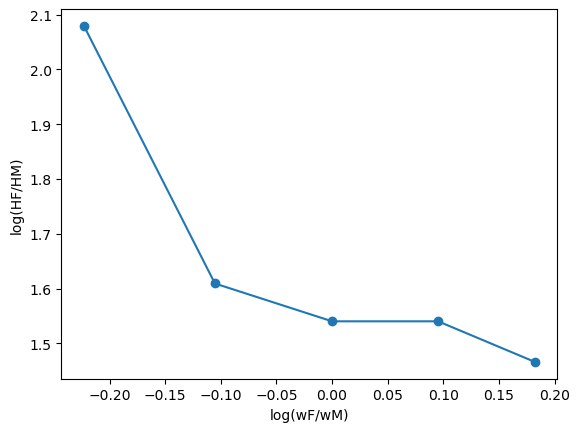

In [40]:
# define wf to vary
wf_vec = np.linspace(0.8, 1.2, 5)
log_wfwm_list = []
log_HFHM_ratio_list = []

for wf in wf_vec:
    model.par.wF=wf
    opt=model.solve_discrete()
    log_wfwm_list.append(math.log(wf/model.par.wM))
    log_HFHM_ratio_list.append(math.log(opt.HF/opt.HM))

# create table with results
results_df1 = pd.DataFrame({'wfwm': log_wfwm_list,
                           'HFHM_ratio': log_HFHM_ratio_list})
print(results_df1)

plt.plot(results_df1['wfwm'], results_df1['HFHM_ratio'], 'o-')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.show()

Question 3

       wfwm  HFHM_ratio
0 -0.223144    0.223144
1 -0.105361    0.223144
2  0.000000    0.000000
3  0.095310   -0.223144
4  0.182322   -0.223144


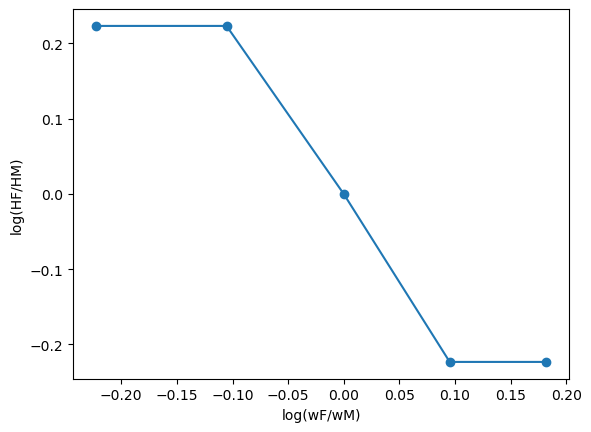

In [37]:
# define wf to vary
log_wfwm_list = []
log_HFHM_ratio_list = []

for wf in wf_vec:
    model.par.wF=wf
    opt=model.solve()
    log_wfwm_list.append(math.log(wf/model.par.wM))
    log_HFHM_ratio_list.append(math.log(opt.HF/opt.HM))

# create table with results
results_df1 = pd.DataFrame({'wfwm': log_wfwm_list,
                           'HFHM_ratio': log_HFHM_ratio_list})
print(results_df1)

plt.plot(results_df1['wfwm'], results_df1['HFHM_ratio'], 'o-')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.show()

Question 4

Question 5